In [43]:
import pandas as pd

In [44]:
df_fix = pd.read_csv('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Dataset\\Processed\\df_fix.csv')

In [45]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   6308 non-null   int64  
 1   date         6308 non-null   object 
 2   Tavg         6308 non-null   float64
 3   RH_avg       6308 non-null   float64
 4   ss           6308 non-null   float64
 5   ddd_x        6308 non-null   float64
 6   ff_avg       6308 non-null   float64
 7   RR           6308 non-null   float64
 8   ddd_car      6308 non-null   object 
 9   region_name  6308 non-null   object 
 10  flood        6308 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 542.2+ KB


In [46]:
df_fix = df_fix.drop(columns=['Unnamed: 0','date'], axis=1)

In [47]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tavg         6308 non-null   float64
 1   RH_avg       6308 non-null   float64
 2   ss           6308 non-null   float64
 3   ddd_x        6308 non-null   float64
 4   ff_avg       6308 non-null   float64
 5   RR           6308 non-null   float64
 6   ddd_car      6308 non-null   object 
 7   region_name  6308 non-null   object 
 8   flood        6308 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 443.7+ KB


In [48]:
df_target = df_fix['flood']

In [49]:
df_train_dumied = pd.get_dummies(df_fix, columns=['ddd_car', 'region_name'])

In [50]:
df_train_dumied.dtypes

Tavg                           float64
RH_avg                         float64
ss                             float64
ddd_x                          float64
ff_avg                         float64
RR                             float64
flood                            int64
ddd_car_C                         bool
ddd_car_E                         bool
ddd_car_N                         bool
ddd_car_NE                        bool
ddd_car_NW                        bool
ddd_car_S                         bool
ddd_car_SE                        bool
ddd_car_SW                        bool
ddd_car_W                         bool
region_name_Jakarta Pusat         bool
region_name_Jakarta Selatan       bool
region_name_Jakarta Timur         bool
region_name_Jakarta Utara         bool
dtype: object

In [51]:
from imblearn.over_sampling import RandomOverSampler    
X = df_train_dumied
y = df_target

# Inisialisasi RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Melakukan oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Menampilkan jumlah sampel setelah oversampling
print("Jumlah sampel setelah oversampling:")
print(y_resampled.value_counts())

Jumlah sampel setelah oversampling:
flood
0    5832
1    5832
Name: count, dtype: int64


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 9331
Jumlah data uji: 2333


In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [54]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train) 


y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [55]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=42)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


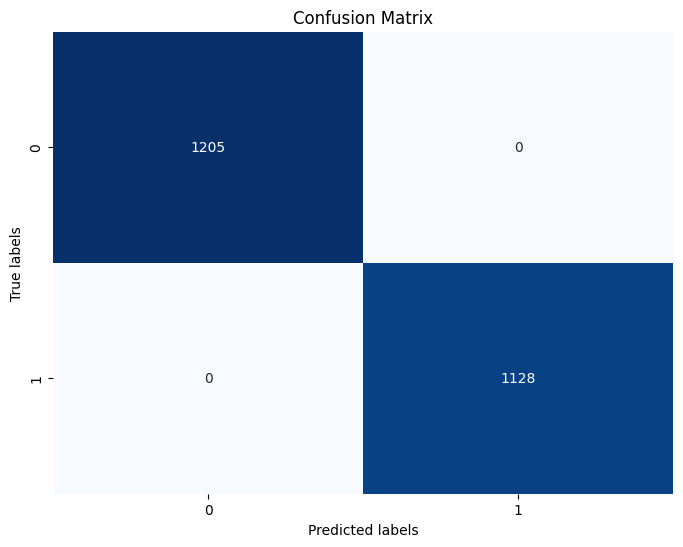

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = rf.predict(X_test)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()